[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/ODEs/blob/main/Chp1/00-Introduction.ipynb)


# <a name="PlotIntro"> An Overview of Plotting with R</a>
---

Plots can provide a useful visual summary of the data. Sometimes, a nice plot or two is all that is need for statistical analysis. In this document, we cover a basic overview of creating some plots in R.

Here’s a link to a more thorough coverage of plotting in R:
<https://r-graph-gallery.com/index.html>.



# <a name="FindHelp">Finding Help Documentation</a>
---

The plotting functions introduced in this document have robust help documentation with lots of options to customize your plots. If you want to view help documentation for any of the functions used in this document, run commands such`?hist`, `?plot`, `?table`, and so on.



In [ ]:
# access help documentation for hist
?hist  #Side panel should open with help doc

# <a name="packages">What Are Packages in R?</a>
---

R packages are a collection functions, sample data, and/or other code scripts. R installs a set of default packages during installation. In this case, we are working with R in a cloud using [Google Colaboratory](https://colab.research.google.com/). The files, code, and data associated to installed packages are saved in the cloud and not locally on your computer. Many R packages have already been installed.

**Run the code cell below to get a list of all default R packages available in Google Colaboratory.**



In [6]:
# See a list of installed default packages
allpack <- installed.packages()
rownames(allpack)

[1] "IRdisplay"     "IRkernel"      "pbdZMQ"        "repr"         
  [5] "askpass"       "backports"     "base64enc"     "bit"          
  [9] "bit64"         "blob"          "brew"          "brio"         
 [13] "broom"         "bslib"         "cachem"        "callr"        
 [17] "cellranger"    "cli"           "clipr"         "colorspace"   
 [21] "commonmark"    "cpp11"         "crayon"        "credentials"  
 [25] "curl"          "data.table"    "DBI"           "dbplyr"       
 [29] "desc"          "devtools"      "diffobj"       "digest"       
 [33] "dplyr"         "dtplyr"        "ellipsis"      "evaluate"     
 [37] "fansi"         "farver"        "fastmap"       "forcats"      
 [41] "fs"            "gargle"        "generics"      "gert"         
 [45] "ggplot2"       "gh"            "gitcreds"      "glue"         
 [49] "googledrive"   "googlesheets4" "gtable"        "haven"        
 [53] "highr"         "hms"           "htmltools"     "httr"         
 [57] "httr2"         "ids"           "ini"           "isoband"      
 [61] "jquerylib"     "jsonlite"      "knitr"         "labeling"     
 [65] "lifecycle"     "lubridate"     "magrittr"      "memoise"      
 [69] "mime"          "modelr"        "munsell"       "openssl"      
 [73] "pillar"        "pkgbuild"      "pkgconfig"     "pkgload"      
 [77] "praise"        "prettyunits"   "processx"      "progress"     
 [81] "ps"            "purrr"         "R6"            "rappdirs"     
 [85] "rcmdcheck"     "RColorBrewer"  "readr"         "readxl"       
 [89] "rematch"       "rematch2"      "remotes"       "reprex"       
 [93] "rlang"         "rmarkdown"     "roxygen2"      "rprojroot"    
 [97] "rstudioapi"    "rversions"     "rvest"         "sass"         
[101] "scales"        "selectr"       "sessioninfo"   "stringi"      
[105] "stringr"       "svglite"       "sys"           "systemfonts"  
[109] "testthat"      "tibble"        "tidyr"         "tidyselect"   
[113] "tidyverse"     "timechange"    "tinytex"       "tzdb"         
[117] "usethis"       "utf8"          "uuid"          "vctrs"        
[121] "viridisLite"   "vroom"         "waldo"         "whisker"      
[125] "withr"         "xfun"          "xml2"          "xopen"        
[129] "yaml"          "zip"           "base"          "boot"         
[133] "class"         "cluster"       "codetools"     "compiler"     
[137] "datasets"      "foreign"       "graphics"      "grDevices"    
[141] "grid"          "KernSmooth"    "lattice"       "MASS"         
[145] "Matrix"        "methods"       "mgcv"          "nlme"         
[149] "nnet"          "parallel"      "rpart"         "spatial"      
[153] "splines"       "stats"         "stats4"        "survival"     
[157] "tcltk"         "tools"         "utils"

## <a name="loadpack">Loading Packages with the `library` command.</a>
---

Each time we start or restart a new session and want to access the library of functions and data in the package, we need to load the library of files in the package with the `library()` command.

To demonstrate how to create common statistical plots in R, we will use the `storms` data set which is located in the package `dplyr`.

- The `dplyr` package is already installed in Google Colaboratory
-  We still need to use a `library` command to load the package.
- **Run the code cell below to load the `dplyr` package.**




In [7]:
# load the library of functions and data in dplyr
library(dplyr)

## <a name="reload">Reloading Packages When Restarting a Session
---

If we take a break in our work, it is possible our R session will time out and close. [**Each time we restart an R session, we will need to rerun `library()` commands in order reload any packages we plan to use**]{style="color: tomato;"}.

The same caution applies to any objects, vectors, or data frames we create or edit in an R session. If a session times out, and we want to use an object `x` that we previously created, we will need to run the code cell(s) where object `x` is created again before we can refer back to `x` in the current session.

**BE SURE YOU RUN THE COMMAND `library(dplyr)` BEFORE ATTEMPTING TO RUN ANY OF THE CODE CELLS BELOW!**

# <a name="storms">Summarizing `storms` Data</a>
---

The package `dplyr` contains a data set called `storms`. Let’s find some useful information about this data.

- The first code cell below will open the help manual for `storms` in a side bar.
  - Feel free to close the help side bar.
- The second code cell below will provide a numeric summary of all variables in the `storms` data.
- Recall we need to first run the command `library(dplyr)` in the code cell above to be able to access `storms`.

In [8]:
# be sure to run the code cell above first
# so you have loaded the dplyr package
?storms

In [9]:
# See a summary of all variables
summary(storms)

     name                year          month             day       
 Length:19066       Min.   :1975   Min.   : 1.000   Min.   : 1.00  
 Class :character   1st Qu.:1993   1st Qu.: 8.000   1st Qu.: 8.00  
 Mode  :character   Median :2004   Median : 9.000   Median :16.00  
                    Mean   :2002   Mean   : 8.699   Mean   :15.78  
                    3rd Qu.:2012   3rd Qu.: 9.000   3rd Qu.:24.00  
                    Max.   :2021   Max.   :12.000   Max.   :31.00  
                                                                   
      hour             lat             long                         status    
 Min.   : 0.000   Min.   : 7.00   Min.   :-109.30   tropical storm     :6684  
 1st Qu.: 5.000   1st Qu.:18.40   1st Qu.: -78.70   hurricane          :4684  
 Median :12.000   Median :26.60   Median : -62.25   tropical depression:3525  
 Mean   : 9.094   Mean   :26.99   Mean   : -61.52   extratropical      :2068  
 3rd Qu.:18.000   3rd Qu.:33.70   3rd Qu.: -45.60   other low

# <a name="onequant">One Quantitative Variable</a>
---

Often a graph or plot is a more preferred format to summarize a variable than a summary statistics. The documentation below explains we could graphically summarize the quantitative variable `pressure`.

## <a name="histogram">Histograms</a>
---

The `hist` function can be used create a
<font color='dodgerblue'>**histogram**</font> of a numerical vector.

-  See histogram documentation: <https://r-graph-gallery.com/histogram.html>
- Like making colorful plots? [Here’s a guide to colors in R](https://bookdown.org/hneth/ds4psy/D-3-apx-colors-basics.html).
- We use a `$` symbol to indicate the name of the variable in `storms` we will access in the plot.

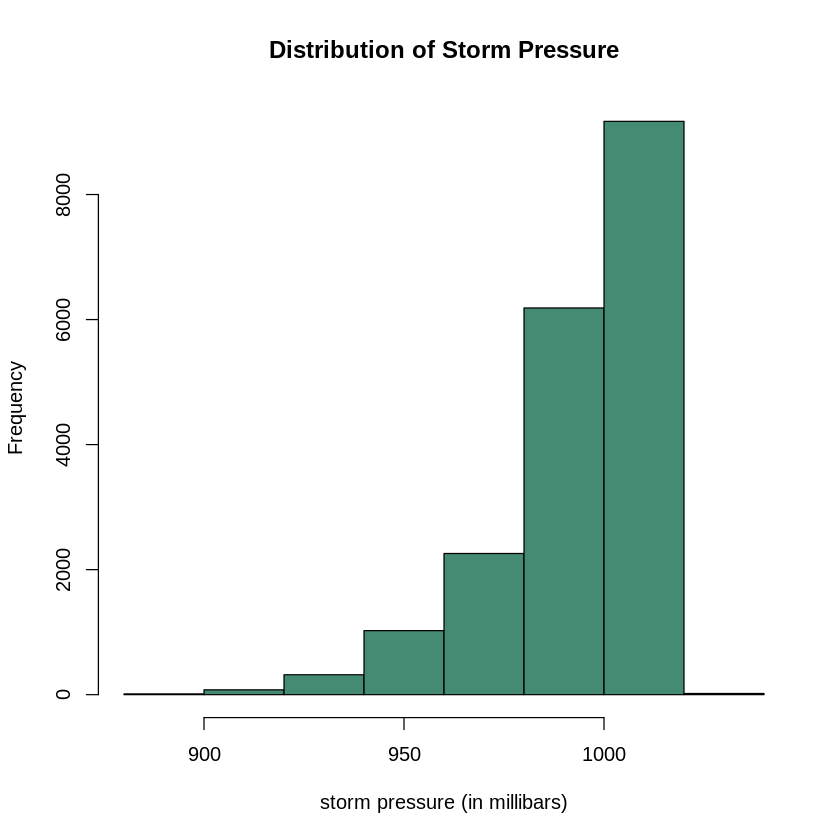

In [10]:
hist(storms$pressure,  # plot pressure variable in storms data
     xlab = "storm pressure (in millibars)",  # x-axis label
     main = "Distribution of Storm Pressure",  # main title
     breaks = 10,  # number of breaks or bins
     col = "aquamarine4")  # color of bars

## <a name="density">Density Plots</a>
---

A histogram is more sensitive to its options. For example, a histogram with 3 breaks may tell a different story than plotting the same data with 20 breaks.

Thus, we may prefer to use a <font color='dodgerblue'>**density
plot**</font>.

1. First compute density of `pressure`. 
  - For more information, see [density help documentation](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/density).

2. The `plot()` function will then create a density plot.


- For more advanced density plots see <https://r-graph-gallery.com/density-plot.html>.
- If a variable is categorical, `plot()` will create a different plot, namely a bar chart.
- `plot()` can also be used to generate a plot to compare two different variables.
- The output of `plot()` depends on the type and number of variables that we input in the function. 

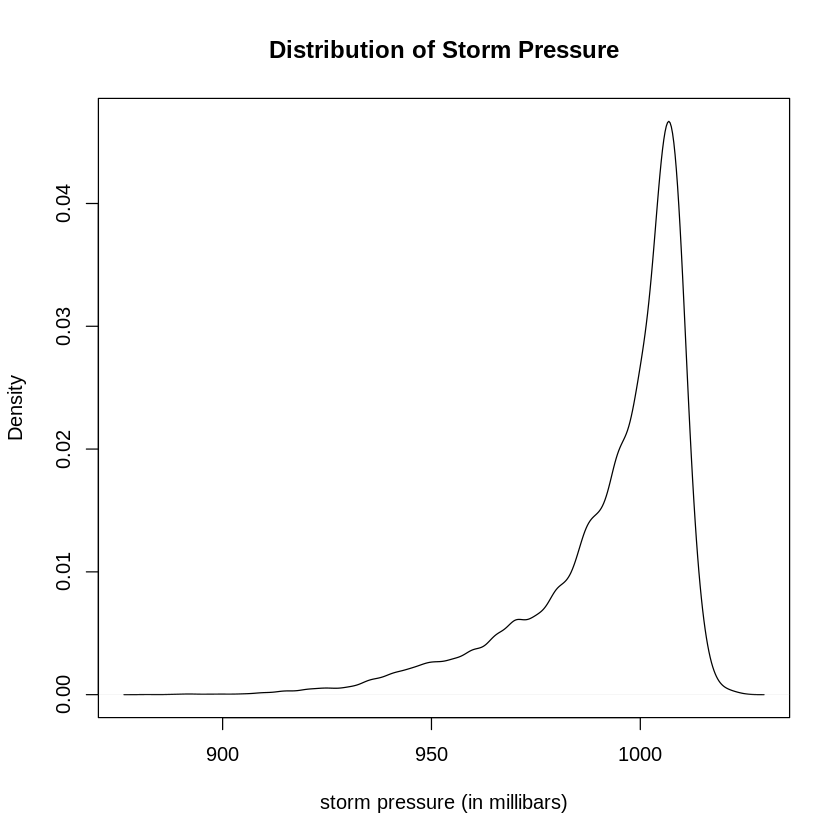

In [11]:
# approximate densities and then plot
plot(density(storms$pressure),
     xlab = "storm pressure (in millibars)",  # horizontal axis label
     main = "Distribution of Storm Pressure")  # main title

## <a name="boxplot">Boxplots</a>
---

<font color='dodgerblue'>**Boxplots**</font> are another useful plot
for presenting the distribution of a quantitative variable using quartiles and the five number summary.

-  See boxplot documentation at <https://r-graph-gallery.com/boxplot.html>.
- Run the command `?boxplot` to see more options.

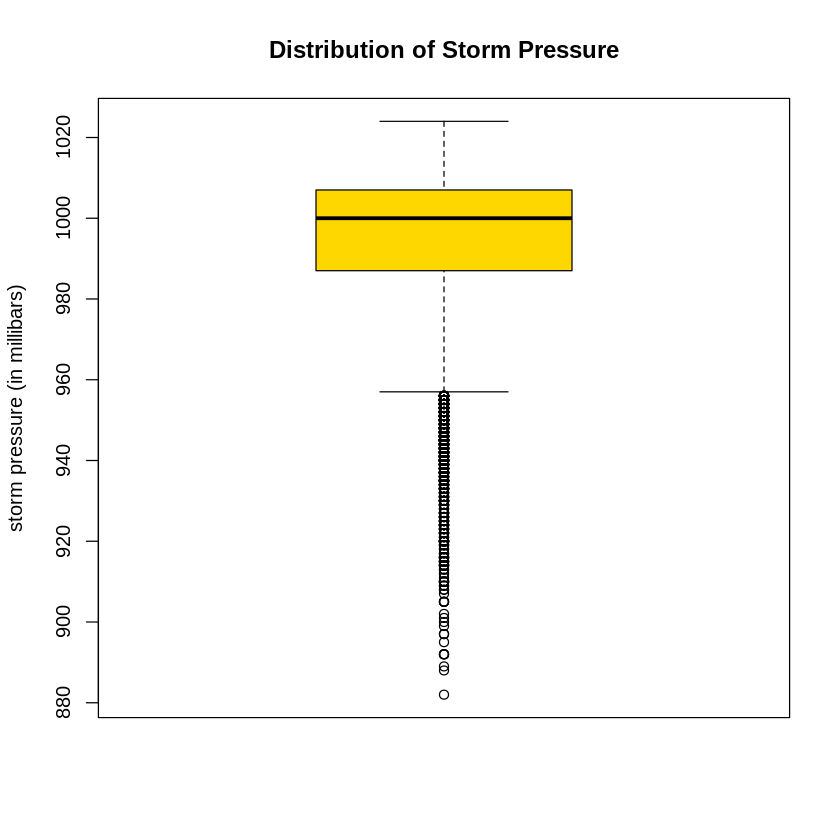

In [12]:
# create boxplot of quantitative variable
boxplot(storms$pressure,
        ylab = "storm pressure (in millibars)",  # horizontal axis label
        col = "gold",  # color of box
        main = "Distribution of Storm Pressure")  # main title

### <a name="box-layout">Changing the Layout of Boxplots</a>
---

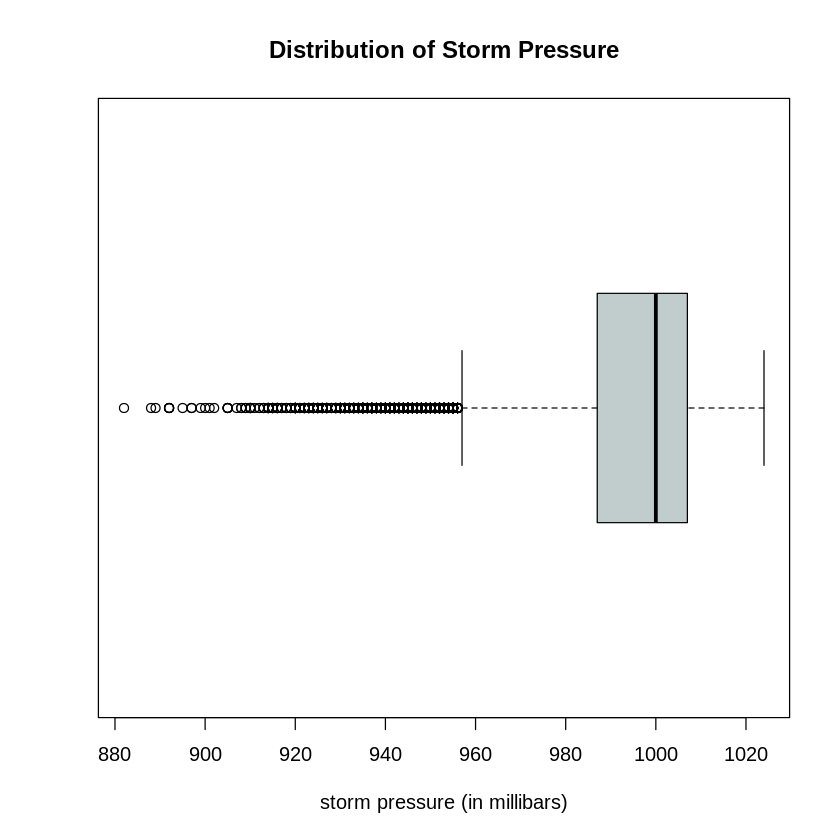

In [13]:
# horizontally aligned boxplot
boxplot(storms$pressure,
        horizontal = TRUE,  # display horizontally
        xlab = "storm pressure (in millibars)",  # horizontal axis label
        main = "Distribution of Storm Pressure",  # main title
        col = "azure3")  # color

# <a name="onequal">One Qualitative Variable</a>
---

Qualitative (also called categorical) variables required other types of plots. For example, we cannot create a density or boxplot for a qualitative variable. Qualitative variables may be stored as characters (such as the `status` variable) or values (such as the `category` variable). This brings up a good question:

> How can we tell whether a variable is stored as a numerical variable, a categorical variable, or perhaps as a string of characters?


## <a name="typeof">Checking the Data Type</a>
---

**The `typeof()` command can help identify what is the type of a variable.**


In [14]:
typeof(storms$status)
typeof(storms$category)

[1] "integer"

[1] "double"

### <a name="datatypes">Data Types</a>
---

From the output above, we see:

-   The variable `status` is initially read as an `integer`.
  - The individual values are **strings of characters** such as "tropical storm" or "hurricane".
  - The summary statistics of `status` are **counts** that are stored as integers.
-   The variable `category` is initially read as `double` or decimal values.
  - The individual values are ordinal integers "1", "2", "3", "4", and "5" for category of hurricane. 
  - There are 14,2328 `NA` (or missing) values corresponding to the observations that are not hurricanes.
  - The summary statistics of `category` (such as the mean) are stored decimals.
  - However, we would like to treat `category` as a qualitative variable and plot how many storms fall into each category.

## <a name="caution">Caution with Data Types and Using `plot()`</a>
---

If we try to use the general `plot()` function, R will give its best guess at which plot makes the most sense to display the data. If the data is stored as the wrong data type, `plot()` will not work as we might expect.

- Run the two code cells below, and notice the following:
  - The output of the `plot(storms$status)` looks like a reasonable bar chart.
  - The output of `plot(storms$category)` does not nicely summarize the counts of how many storms are in each category.



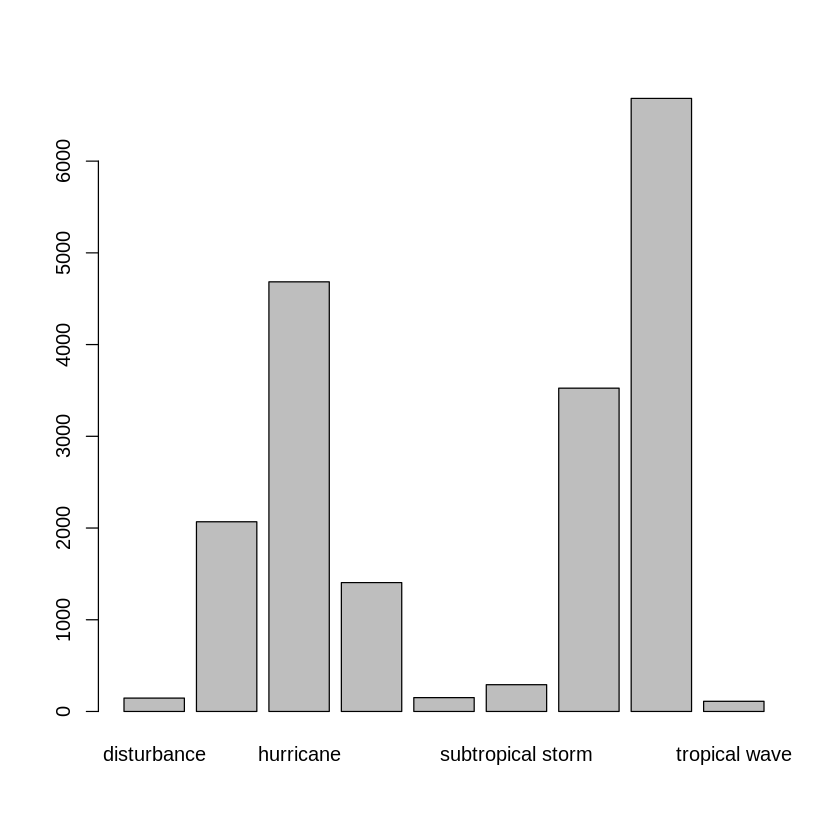

In [15]:
plot(storms$status)  # plot of status

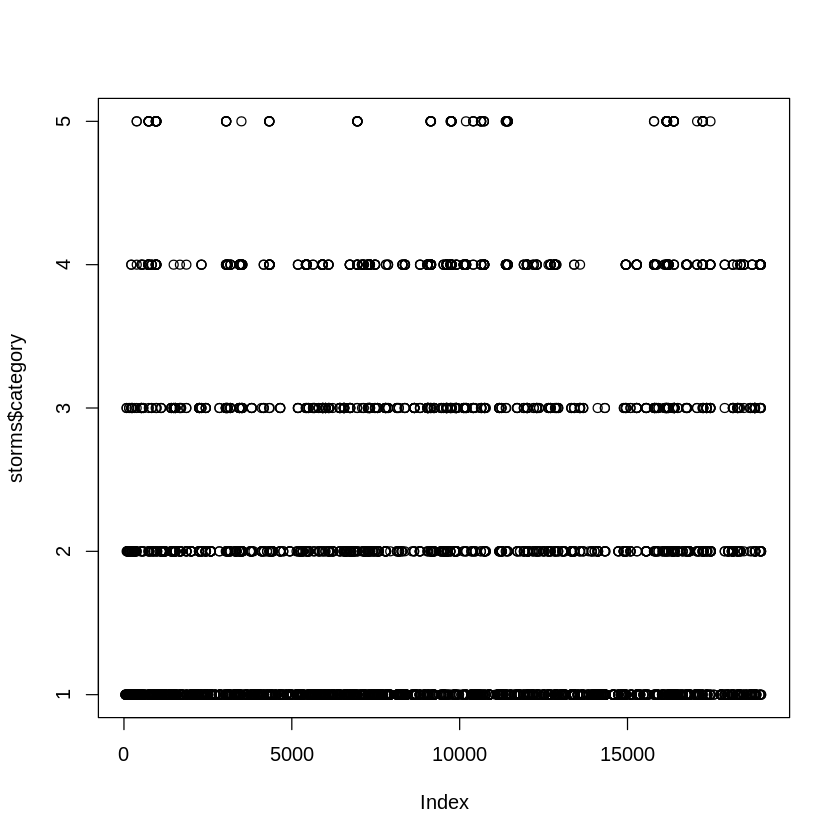

In [16]:
plot(storms$category)  # plot of category

## <a name="table">Creating Bar Charts From Tables</a>
---

The `table()` function will count the number of times a value (or string of characters) occurs in a vector or variable.

-   [Official Documentation Page for    `table()`](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/table)
-   [Another nice resource with examples](https://www.statology.org/table-function-in-r/)

One way to improve the initial plot of categories above is as follows:

1. First use the `table()` command to count how many storms are in each category.
2. Then create a bar chart using the `barplot()` function.

In [17]:
cat.table <- table(storms$category)  # create table of counts
cat.table  # print table to screen


   1    2    3    4    5 
2478  973  579  539  115 

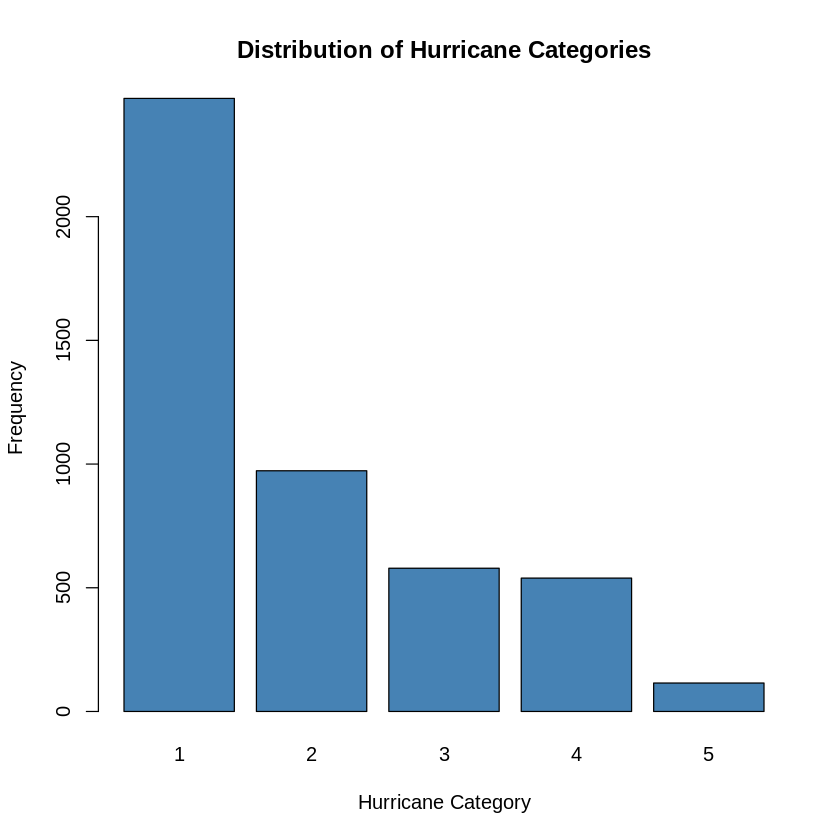

In [18]:
# create bar chart from table counts
barplot(cat.table,  # input table from previous code cell
        main = "Distribution of Hurricane Categories",  # main title
        xlab = "Hurricane Category",  # horizontal axis label
        ylab = "Frequency",  # vertical axis label
        col = "steelblue")  # fill color of bars

## <a name="relative">Relative Frequency Tables and Bar Charts</a>
---

If instead of plotting the number of hurricanes in each category we wish to plot the **proportion** of all hurricanes in each category, we can use the `prop.table()` function to convert the table counts to proportions relative to the grand total.

**Run the two code cells below to create a relative frequency bar chart.**

1. We input our previous table of counts, `cat.table`, into the function `prop.table()` to convert counts to proportions.
2. Then we create a bar chart of the resulting proportions.

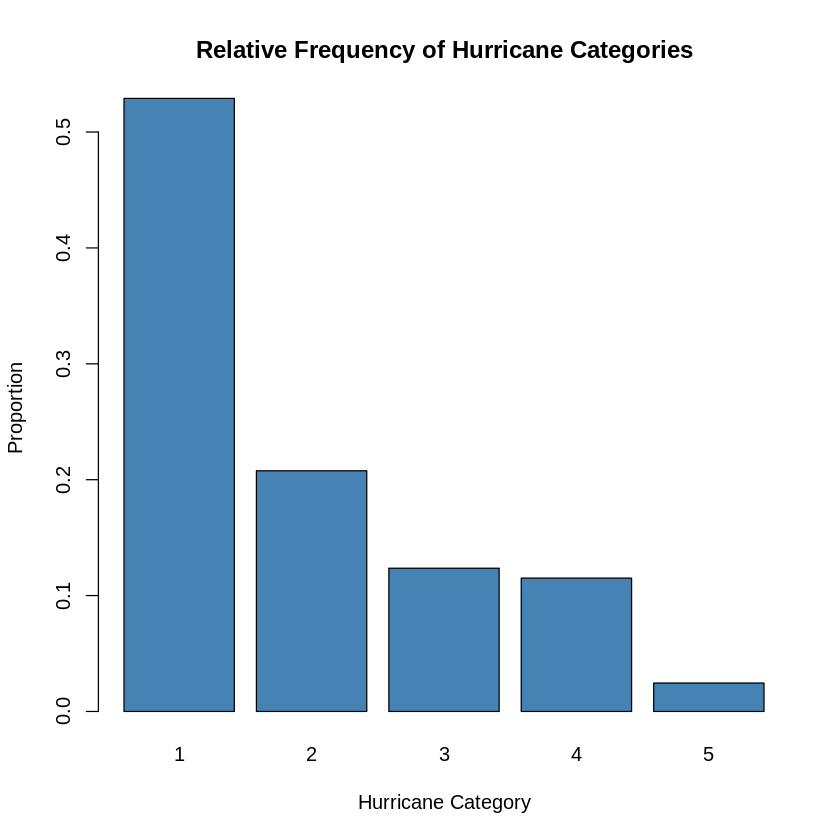

In [19]:
cat.prop <- prop.table(cat.table)  # create table of proportions
barplot(cat.prop,  # input table of proportions
        main = "Relative Frequency of Hurricane Categories",  # main title
        xlab = "Hurricane Category",  # horizontal axis label
        ylab = "Proportion",  # vertical axis label
        col = "steelblue")  # fill color of bars

### Caution with `prop.table()`
---

- <font color="tomato">The input into `prop.table()` must be a table rather than a vector or data frame column.</font>
-  The code cell below does return a relative frequency table as we would expect since we did not <font color="dodgerblue">first create a table of counts from `storms$category`</font>.

In [20]:
prop.table(storms$category)

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [25] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [49] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [73] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
   [97] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [121] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [145] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [193] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [217] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [241] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [265] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [289] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [313] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [337] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [361] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [385] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [409] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [433] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [457] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [481] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [505] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [529] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [553] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [577] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [601] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [625] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [649] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [673] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [697] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [721] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [745] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [769] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [793] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [817] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [841] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [865] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [889] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [913] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [937] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [961] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [985] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1009] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1033] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1057] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1081] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1105] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1129] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1153] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [1177] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [12

## <a name="piechart">Pie Charts with `pie()`</a>
---

<font color='dodgerblue'>**Pie charts**</font> can also be used to illustrate the distribution of one qualitative variable.

-   See <https://r-graph-gallery.com/pie-plot.html>.
-   For help and a list of options, you can run `?pie`.

In [ ]:
?pie

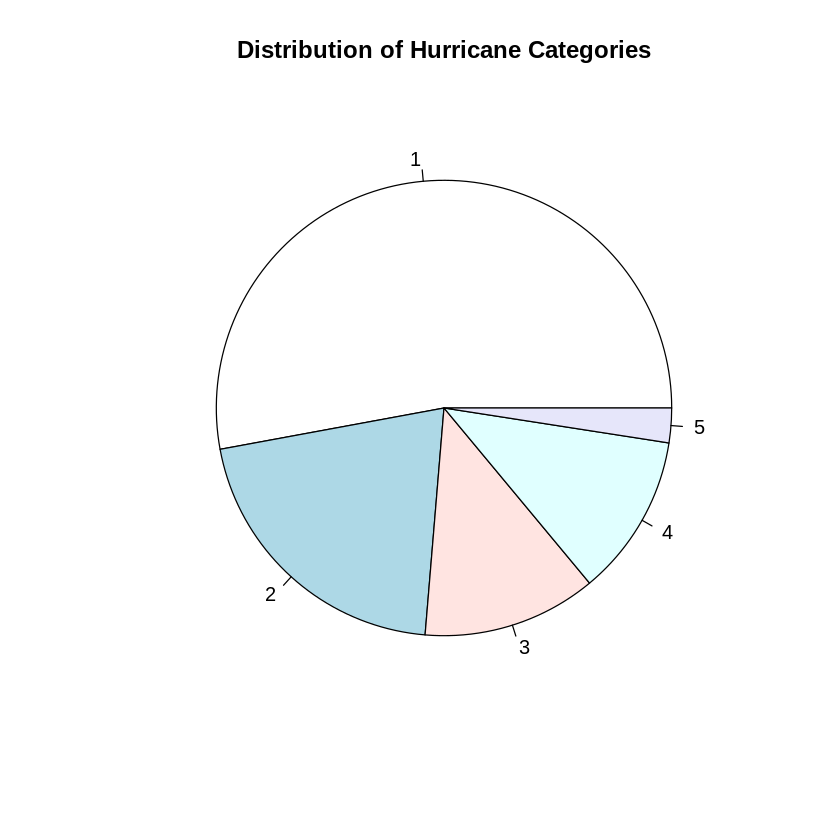

In [21]:
# create pie chart of one qualitative variable
pie(cat.table,  # input table
    main = "Distribution of Hurricane Categories")  # main title

## <a name="factors"> Converting to a `factor()` and Then `plot()`</a>
---

One common issue with a qualitative variable is that it is often stored as the wrong datatype.

-  <font color="dodgerblue">**Qualitative data should typically be stored as a `factor`.**</font>

Another way we can create a bar chart of the counts in each category is to:

1. First convert the qualitative variable to a `factor`. 
2. Then use `plot()` to create an appropriate plot.

**Run the code cell below to first see the summary output of the `category` variable after converting it to a `factor`.**

In [22]:
# creates a copy of storms data set
# so we don't overwrite original storms
storms2 <- storms  

storms2$category <- factor(storms$category)  # convert category to factor
summary(storms2$category)  # get new summary of categories

1     2     3     4     5  NA's 
 2478   973   579   539   115 14382


Notice the summary is a table of counts in each hurricane category.

-  Once the variable `status` is converted to a `factor`, the `plot()` function will know to use a bar chart to give a summary display.

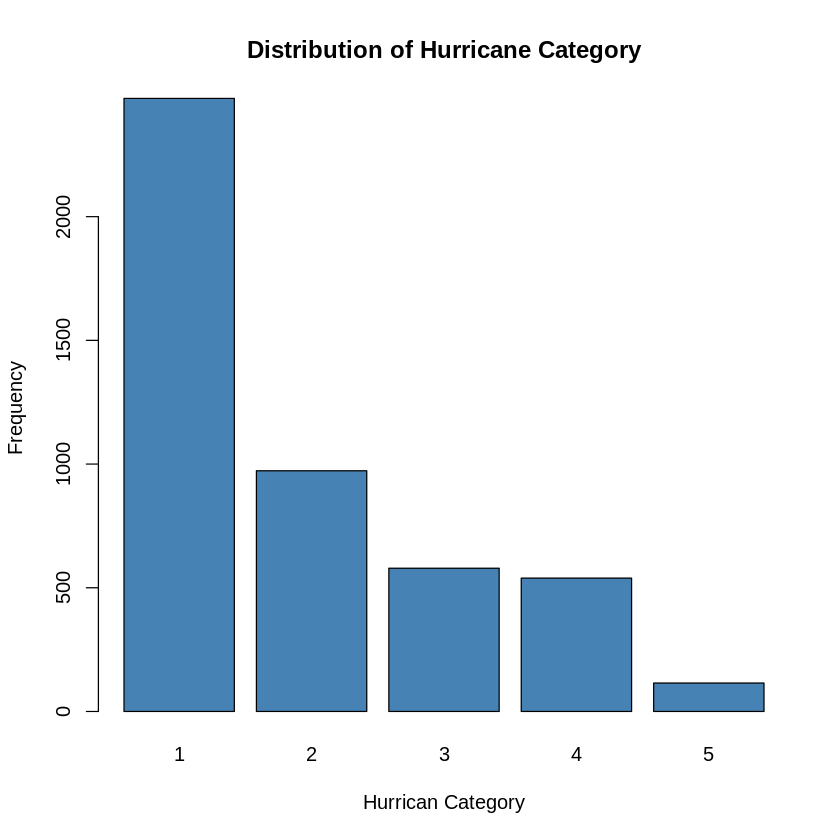

In [23]:
# create bar chart from counts of a factor
plot(storms2$category,  # input a factor
     main = "Distribution of Hurricane Category",  # main title
     xlab = "Hurrican Category",  # horizontal axis label
     ylab = "Frequency",  # vertical axis label
     col = "steelblue")  # color of fill of bars

- <font color="tomato">**Recall without first changing `category` to a `factor`, `plot()` will create a different graph.**</font>

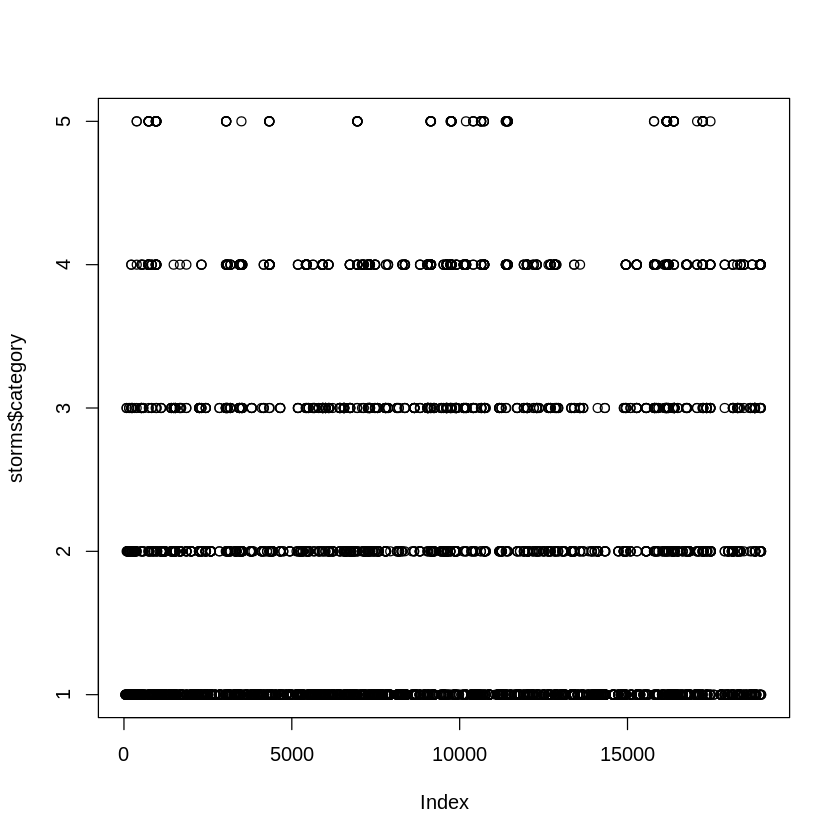

In [24]:
# default plot of category when not first converted to factor
plot(storms$category)

# <a name="quant-qual">Plotting One Quantitative and One Qualitative Variable</a>
---

Imagine we would like to compare the wind speeds of storms by status. In this case, we would like to compare a quantitative variable (`wind`) for different classes of a qualitative variable (`status`).

## <a name="side-by-side-box">Side by Side Boxplots</a>
---

There are many classes of storms status in `storms`.

In the storms data:

- `wind` is a quantitative variable.
- `status` is a qualitative variable.
- We can use the default `plot()` function to create a side by side boxplots.

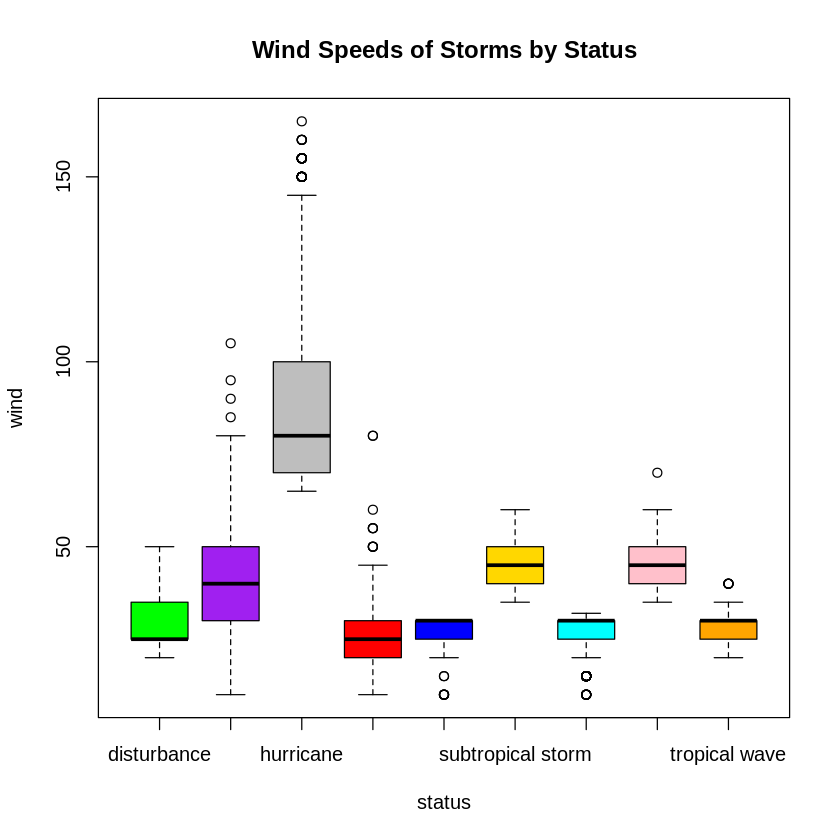

In [25]:
# create a vector of fill colors
# one color for each status type.
my.colors <- c("green", "purple", "grey", "red", 
               "blue", "gold", "cyan", "pink", "orange")

plot(wind ~ status,  # quantitativee first ~ categorical second
     data = storms,  # name of data frame
     col = my.colors,  # fill colors
     main = "Wind Speeds of Storms by Status")  # main title

### <a name="legend">Adding a Legend to Plots</a>
---

- There are a lot of different status of storms.
- It is not easy (or possible) to tell which boxplot corresponds to which storm status.
- Adding a <font color="dodgerblue">**legend**</font> to the plot will help!

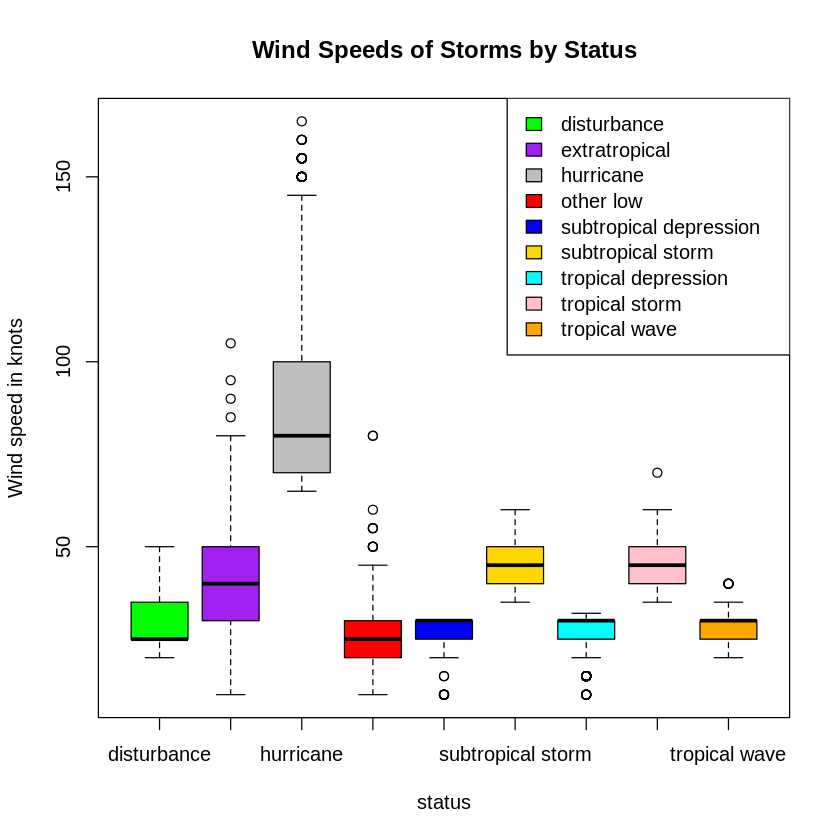

In [26]:
# create a table of status counts
# we will pull of the row names of the table
# as the labels in the legend
status.table <- table(storms$status)

plot(wind ~ status,  # quantitative first ~ categorical second
     data = storms,  # name of data frame
     col = my.colors,  # fill colors colors
     ylab = "Wind speed in knots",  # vertical axis label
     main = "Wind Speeds of Storms by Status")  # main title

# we can add a legend to identify which plot is which storm status
legend(x = "topright",  # place legend in top right corner
       legend=rownames(status.table),  # each row of table is label in legend
       fill = my.colors)  # fill colors

## <a name="subset">Subsetting Data by Category</a>
---

There are many classes of storms status in `storms`. Often, we want to only focus on a smaller subset of classes. We can restrict our attention to compare the wind speeds of three of the classes: "tropical storm", "tropical depression", and "hurricane".


-   We can <font color="dodgerblue">**subset**</font> `storms` data frame into three separate data frames, one for each status of storm, using the `subset()` function.
  - Curious to learn more about `subset`? Run `?subset` in a code cell to access help documentation.
-   Then we can create three separate boxplots of the wind speeds for each status.

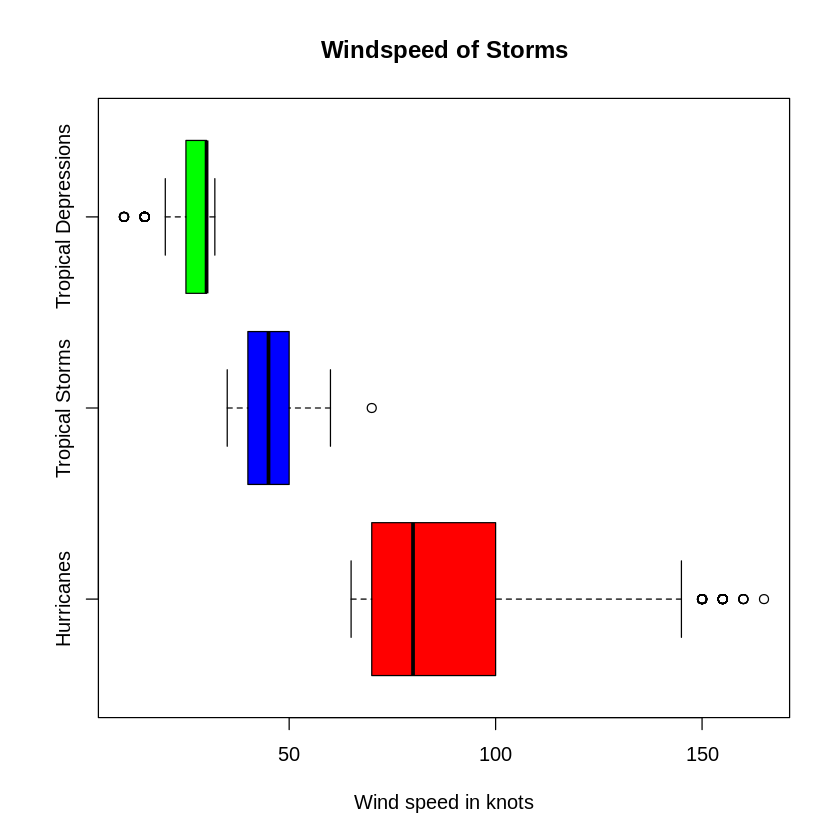

In [27]:
# split data by storm status
hur <- subset(storms,  # data frame name
              status == "hurricane",  # logical test to select observations
              select = wind)  # which quantitative variable(s) to select

trop.storm <- subset(storms, 
                     status == "tropical storm",  # tropical storms
                     select = wind)
trop.dep <- subset(storms, 
                   status == "tropical depression",   # tropical depressions
                   select = wind)

# create side by side boxplot
# for each of the three subsets
boxplot(hur$wind, trop.storm$wind, trop.dep$wind, 
        main = "Windspeed of Storms", 
        names = c("Hurricanes", "Tropical Storms", "Tropical Depressions"), 
        col = c("red", "blue", "green"), 
        xlab = "Wind speed in knots", 
        horizontal = TRUE)

# <a name="two-qual">Relationship Between Two Qualitative Variables</a>
---

Imagine we would like to compare the number of different category hurricanes that occurred in each month. In this case, we would like to compare two qualitative variables, namely `category` and `month`.


## <a name="contingency-table">Creating Contingency or Two-Way Table</a>
---
The command `table(x)` will count the number of times a value (or string of characters) occurs in a vector `x`.

-   [Official Documentation Page for `table()`](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/table)
-   [Nice resource with examples](https://www.statology.org/table-function-in-r/)

The command `table(x, y)` will similarly create a contingency (or two-way) table to jointly compare counts of `x` and `y`.


In [28]:
# create a contingency table for status and month
con.table <- table(storms$category, storms$month) 
con.table  # print output to screen

   
       1    4    5    6    7    8    9   10   11   12
  1    5    0    0   18  140  581 1099  462  140   33
  2    0    0    0    0   25  198  571  150   29    0
  3    0    0    0    0   18  113  346   86   16    0
  4    0    0    0    0   18  114  295   88   24    0
  5    0    0    0    0    1   32   69   13    0    0

## <a name="grouped">Creating Grouped Frequency Bar Charts</a>

---

After creating a two-way table, we can present the results visually in a <font color='dodgerblue'>**grouped bar chart**</font>.

-  See documentation at <https://r-graph-gallery.com/211-basic-grouped-or-stacked-barplot.html>.




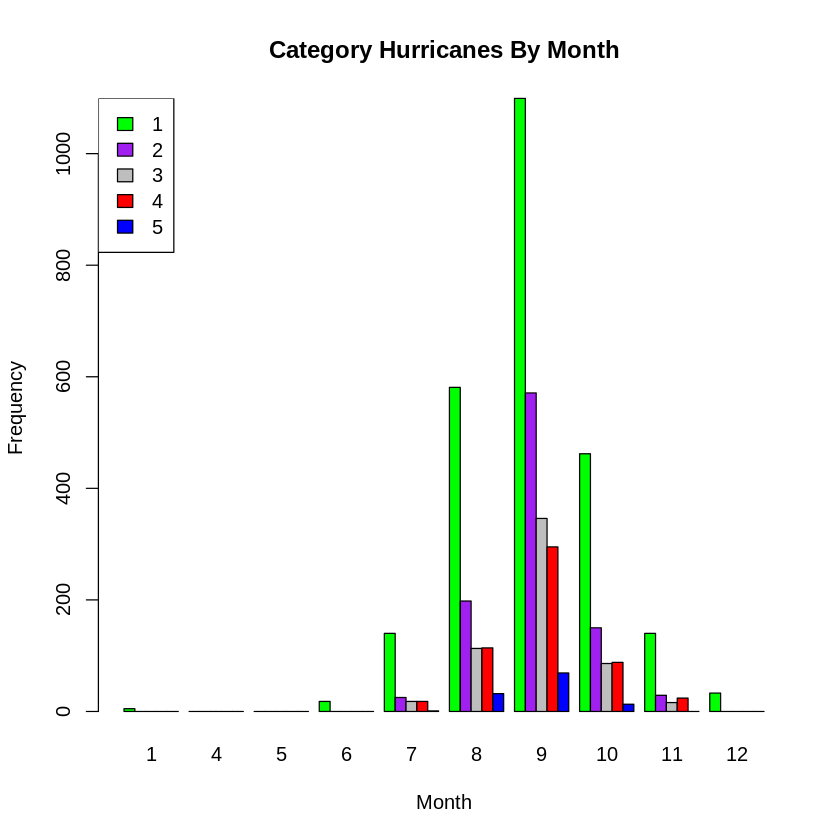

In [29]:
# create a vector of colors
my.colors2 <- c("green", "purple", "grey", "red", "blue") 

# create side by side bar chart
barplot(con.table,  # use counts from contingency table
        beside = TRUE,  # groups side-by-side
        main = "Category Hurricanes By Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors2,  # fill color of bars
        ylab = "Frequency")  # vertical axis label

# add a legend to plot
legend(x="topleft",  # place legend in top left
       legend=rownames(con.table),  # get labels from rowname in contingency table
       fill = my.colors2)  # use same fill colors

## <a name="grouped">Grouped Frequency Bar Charts</a>
---

-   Note `beside = FALSE` is the default.
-   If we do not specify a `beside` option, a **stacked bar chart** is created instead.
-   In the second code cell, we also [add a legend](#legend) to the plot.

In [30]:
########################################################
# Note this has already been run in a previous section
# You do not need to run again if already created
#######################################################

# create a contingency table for status and month
con.table <- table(storms$category, storms$month) 
con.table  # print output to screen

   
       1    4    5    6    7    8    9   10   11   12
  1    5    0    0   18  140  581 1099  462  140   33
  2    0    0    0    0   25  198  571  150   29    0
  3    0    0    0    0   18  113  346   86   16    0
  4    0    0    0    0   18  114  295   88   24    0
  5    0    0    0    0    1   32   69   13    0    0

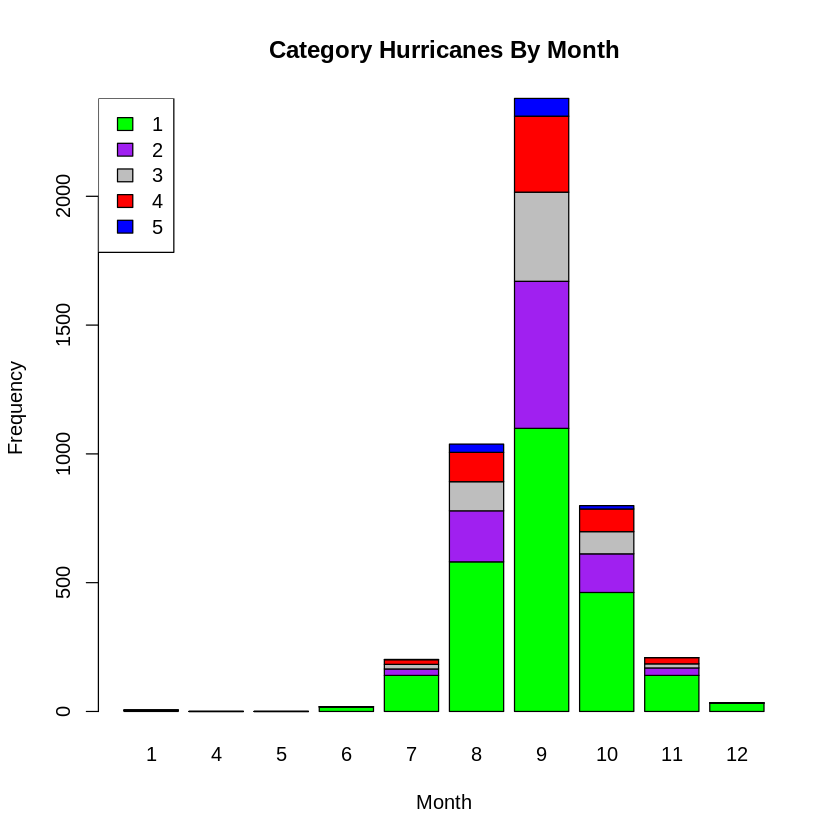

In [31]:
# create a vector of colors
my.colors2 <- c("green", "purple", "grey", "red", "blue") 

# create stacked bar chart
barplot(con.table,  # use counts from contingency table
        main = "Category Hurricanes By Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors2,  # color of bars
        ylab = "Frequency")  # vertical axis label

# add legend to plot
legend(x="topleft",  # place legend in top left
       legend=rownames(con.table),  # get labels
       fill = my.colors2)  # use same colors

## <a name="relative-grand">Stacked Bar Charts Relative to Grand Total</a>
---

1.   First we create a contingency table using `table(x, y)`.
2. Then we use `prop.table([table_name])` to convert to frequencies to proportions out of the grand total.
3. Finally we can create a group bar chart of relative frequencies.

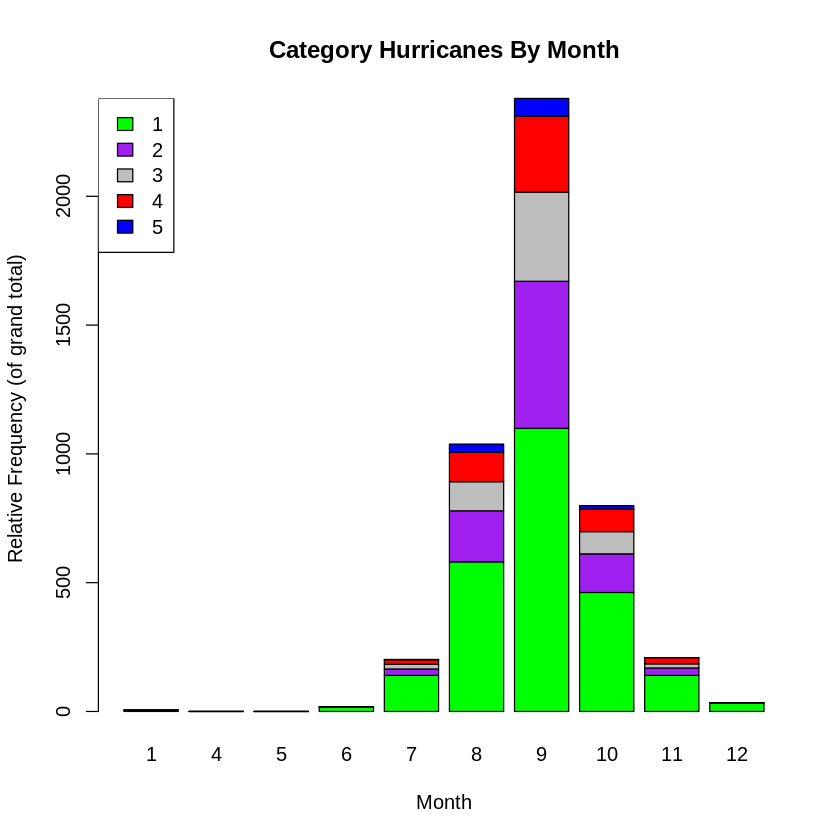

In [32]:
# create two-table of counts
con.table <- table(storms$category, storms$month)

# convert counts to proportions
con.prop <- prop.table(con.table) 

# create a vector of colors
my.colors2 <- c("green", "purple", "grey", "red", "blue") 

# create stacked bar chart
barplot(con.table,  # use counts from contingency table
        main = "Category Hurricanes By Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors2,  # color of bars
        ylab = "Relative Frequency (of grand total)")  # vertical axis label

legend(x="topleft",  # place legend in top left
       legend=rownames(con.table),  # get labels
       fill = my.colors)  # use same fill colors


## <a name="relative-row"> Stacked Bar Chart Relative to Column Totals</a>
---

Often, we would like the proportions in the table to be computed out of the total in each column (instead of the grand total).

-   We add the option `2` inside `prop.table()`.
-   In this example, each column is a different month.

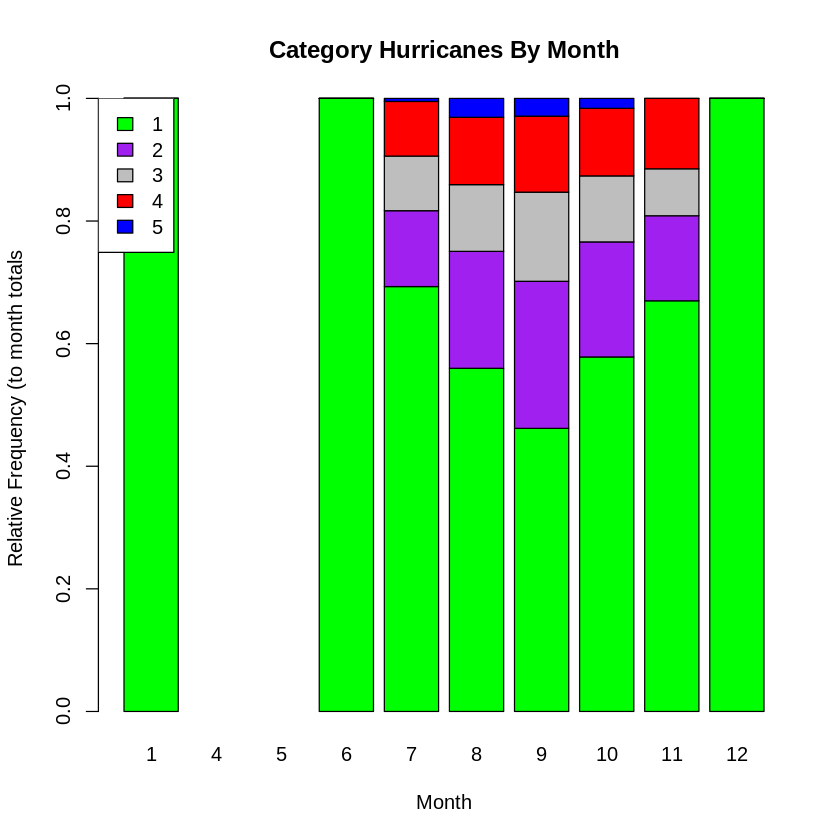

In [33]:
# create two-table of counts
con.table <- table(storms$category, storms$month)

# convert counts to proportions
# note the option 2 added to command below
con.prop.column <- prop.table(con.table, 2)  

# create a vector of colors
my.colors2 <- c("green", "purple", "grey", "red", "blue") 

# create stacked bar chart
barplot(con.prop.column,  # use counts from contingency table
        main = "Category Hurricanes By Month",  # main title
        xlab = "Month",  # horizontal axis label
        col = my.colors2,  # color of bars
        ylab = "Relative Frequency (to month totals")  # vertical axis label

legend(x="topleft",  # place legend in top left
       legend=rownames(con.table),  # get labels
       fill = my.colors)  # use same fill colors

# <a name="two-quant">Relationship Between Two Quantitative Variables</a>
---

Imagine we would like to compare the wind speeds (`wind`) to the pressure (`pressure`). In this case, we would like to compare two quantitative variables.

A <font color='dodgerblue'>**scatter plot**</font> can be
used to identify the relationship between two quantitative variables.

-  **If both variables are quantitative, the `plot()` function by default will create a scatter plot to compare the two variables.**

-  For other types of scatter plots, see documentation: <https://r-graph-gallery.com/scatterplot.html>.

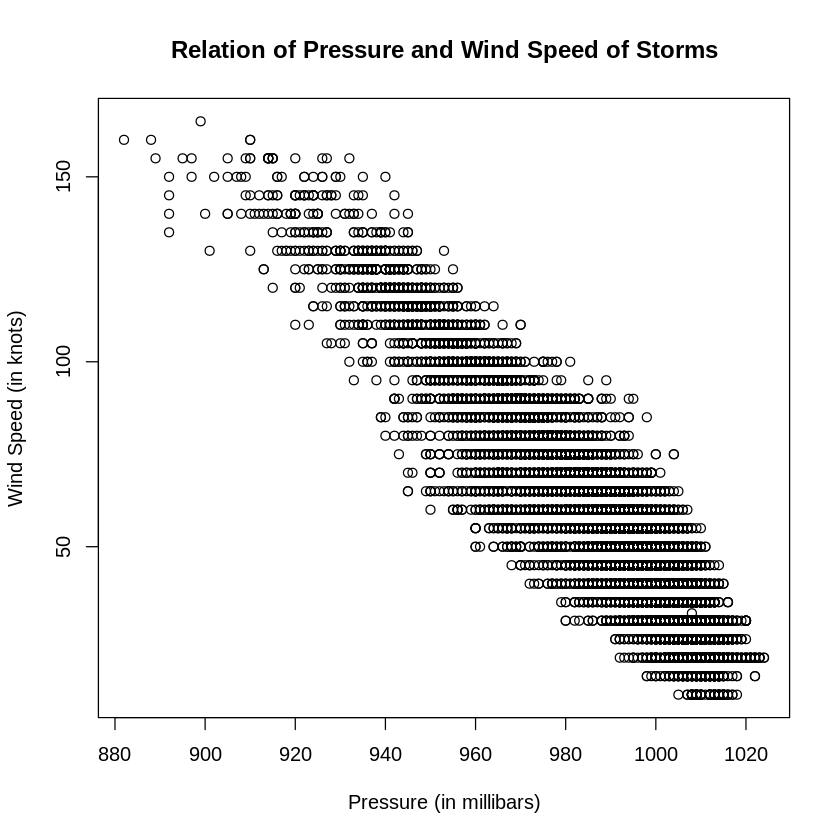

In [34]:
# create a scatter plot
# first variable wind is response (y-axis)
# second variable pressure is predictor (x-axis)

plot(wind ~ pressure,  # response ~ predictor(s)
     data = storms,  # data frame name
     main = "Relation of Pressure and Wind Speed of Storms",  # main title
     xlab = "Pressure (in millibars)",  # horizontal axis label
     ylab = "Wind Speed (in knots)")  # vertical axis label

# <a name="array">Arranging Multiple Plots in an Array</a>
---

-   The command `par(mfrow =c(n,m)` creates an array of $n$ rows and $m$ columns.

-   Plots will fill the array based on the order they are plotted.

-   See <https://bookdown.org/ndphillips/YaRrr/arranging-plots-with-parmfrow-and-layout.html> for more info.

-   <font color="tomato">**Be sure to reset the settings to display one plot per figure with `par(mfrow = c(1, 1))` if you want to go back to displaying one plot per window.**</font>

- See previous sections for further information about each of the plots created below.

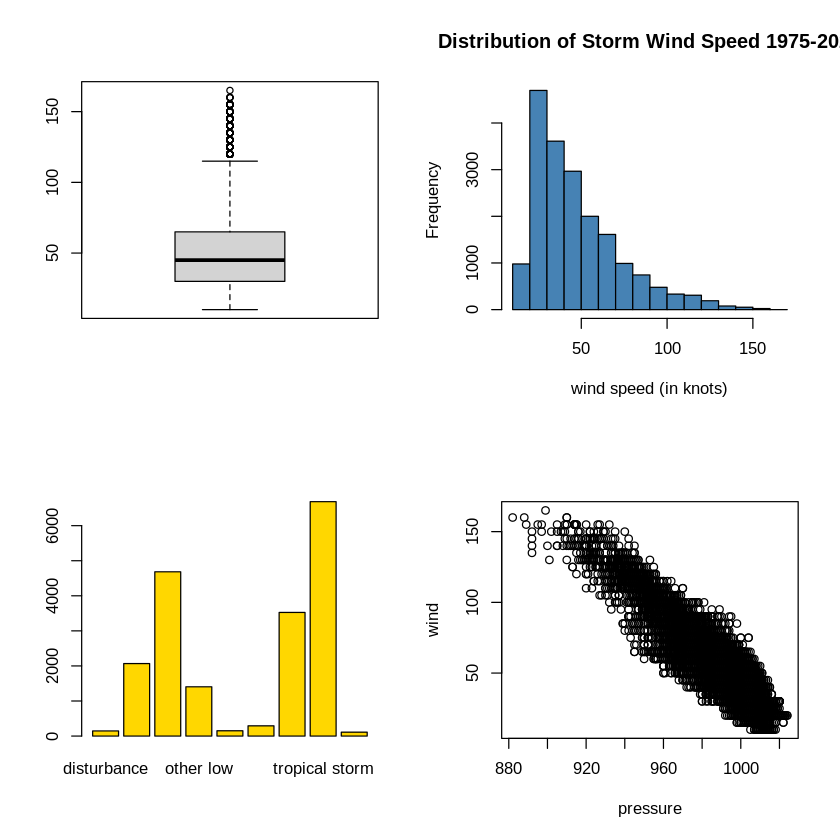

In [35]:
par(mfrow = c(2, 2))  # create a 2 x 2 array of plots

# the next 5 plots created will be arranged in the array
boxplot(storms$wind)  # create boxplot of wind speed

# code below creates a histogram of wind speed
# we can add many options to customize
hist(storms$wind, xlab = "wind speed (in knots)",   # x-axis label
     ylab = "Frequency",  # y-axis label
     main = "Distribution of Storm Wind Speed 1975-2020",  # main label
     col = "steelblue")  # change color of bars

plot(storms$status, col = "gold")  # plots status, which is categorical

plot(wind ~ pressure, data = storms)  # plots two numerical variables

# change back settings so one image displayed in a window
par(mfrow = c(1, 1))  

- Since we entered the command `par(mfrow = c(1, 1))` at the end of the previous code cell plots will now go back to the default of one plot per figure.

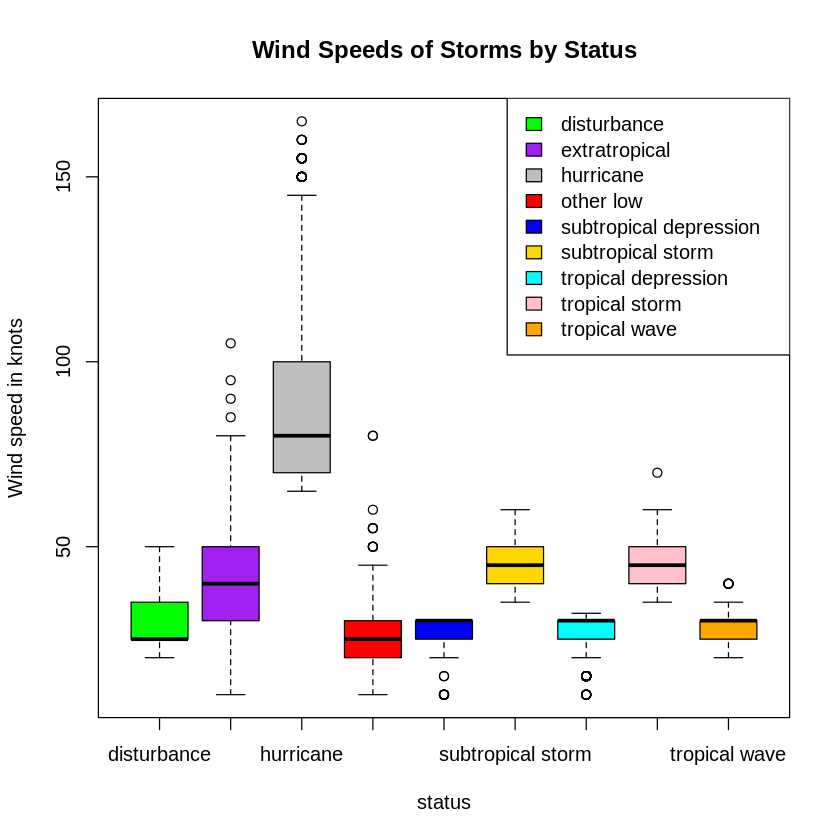

In [36]:
# create a table of status counts
# we will pull of the row names of the table
# as the labels in the legend
status.table <- table(storms$status)

plot(wind ~ status,  # quantitative first ~ categorical second
     data = storms,  # name of data frame
     col = my.colors,  # fill colors colors
     ylab = "Wind speed in knots",  # vertical axis label
     main = "Wind Speeds of Storms by Status")  # main title

# we can add a legend to identify which plot is which storm status
legend(x = "topright",  # place legend in top right corner
       legend=rownames(status.table),  # each row of table is label in legend
       fill = my.colors)  # fill colors

# <a name="ggplot">More Advanced Plots with `ggplot2`</a>
---

The previous plots were created using R’s <font color="dodgerblue">**base** graphics system</font>.

-   **base** graphics are fast and simple to produce while looking
    professional.

A <font color="dodgerblue">fancier alternative is to construct plots using the `ggplot2` package.</font>

-   The `gg` stands for **Grammar of Graphics**.

In its simplest form, to construct a (useful) plot in `ggplot2`, you
need to provide:

-   <font color="dodgerblue">A `ggplot` object.</font>
    -   This is usually the object that holds your data frame.
    -   The data frame is passed to `ggplot` via the first `data` argument.


-   <font color="dodgerblue">A geometry object.</font>
    -   Roughly speaking, this is the *kind* of plot you want.
    -   e.g., `geom_histogram` for a histogram, `geom_point` for a scatter plot, `geom_density` for a density plot.
-   <font color="dodgerblue">An aesthetic mapping.</font>
    -   Aesthetic mappings describe how variables in the data are mapped to visual properties of a geometry.
    -   This is where you specify which variable with be the `x` variable, the `y` variable, which variable will control color in the plots, etc.
-   See <https://ggplot2.tidyverse.org> for documentation.
-   Download a [ggplot2 cheatsheet](https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Misc/data-visualization-2.1.pdf).



## <a name="load-ggplot2">Loading `ggplot2`</a>
---

- The `ggplot2` package is already installed as a default package in Google Colaboratory.

- However, recall each time we start or restart a new session and want to access the library of functions and data in the package, we need to load the library of files in the package with the `library` command.
- **Run the first code cell below to load the `ggplot2` package.**
- If restarting a new session, you also need to reload the `dplyr` package to access `storms` data.

In [37]:
library(ggplot2)

In [ ]:
# may need to reload
library(dplyr)

## <a name="quant-gg">Plotting One Quantitative Variable with `ggplot2`<a>
---

To create various types of plots for one quantitative variable, such as `wind`:

- The **ggplot object** is the data frame `storms`.
- The **aesthetic** is the variable `wind` that we will plot on the x-axis.
- Geometric objects histogram, density, and boxplot are specified in each of the three code cells below.
- There a numerous options we can include as well.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


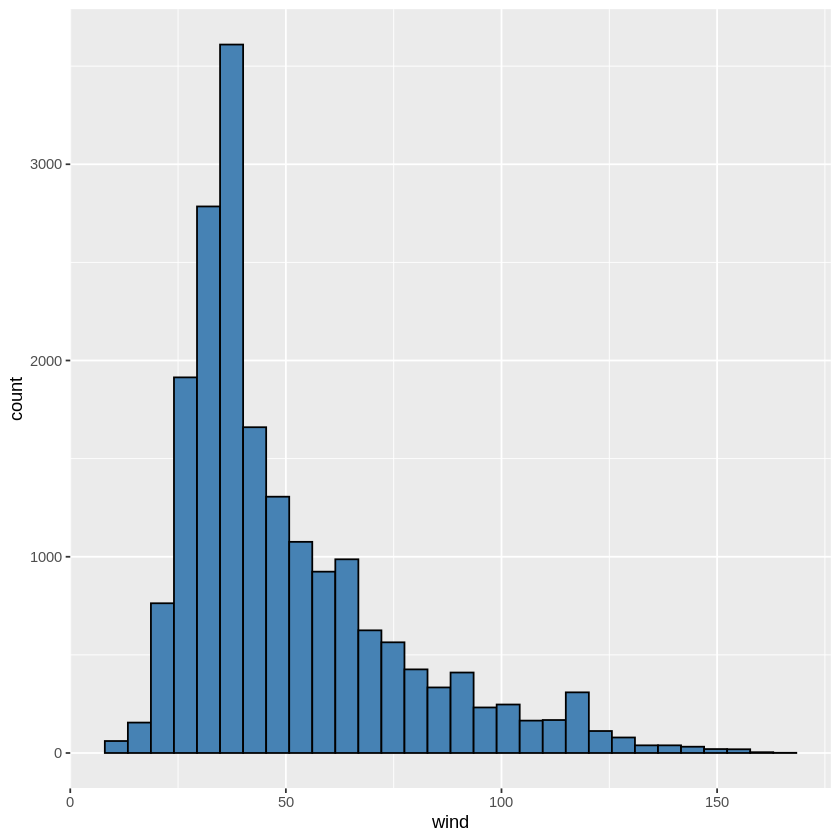

In [38]:
# create a histogram
ggplot(storms, aes(x = wind)) + 
  geom_histogram(fill = "steelblue", color="black")

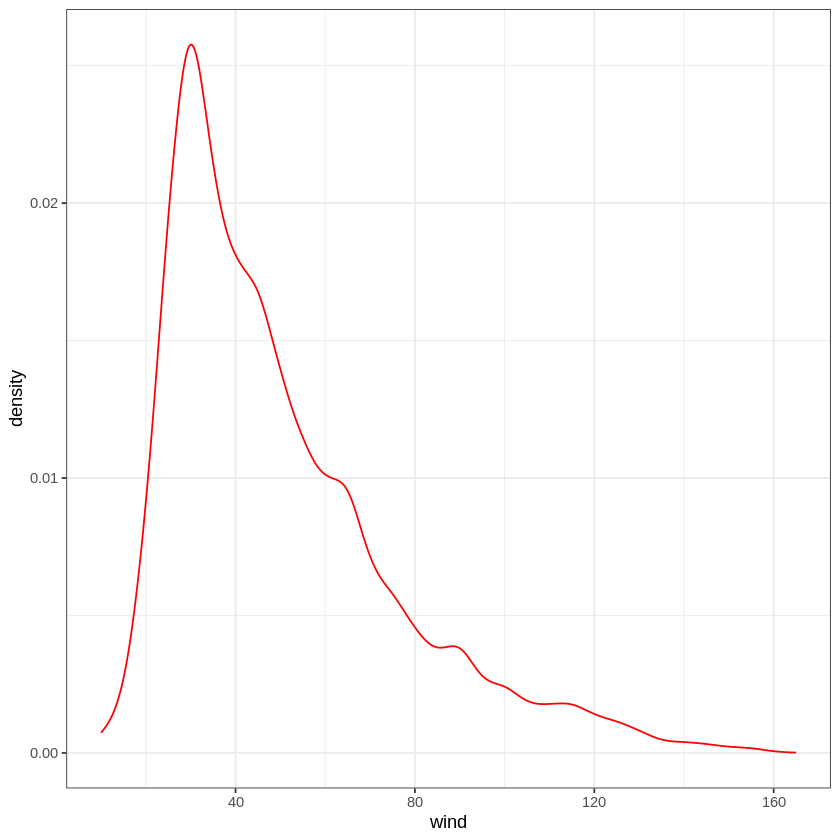

In [39]:
# create a density plot
ggplot(storms, aes(x = wind)) + 
  geom_density(color="red") + 
  theme_bw() # adding theme_bw()  makes white background

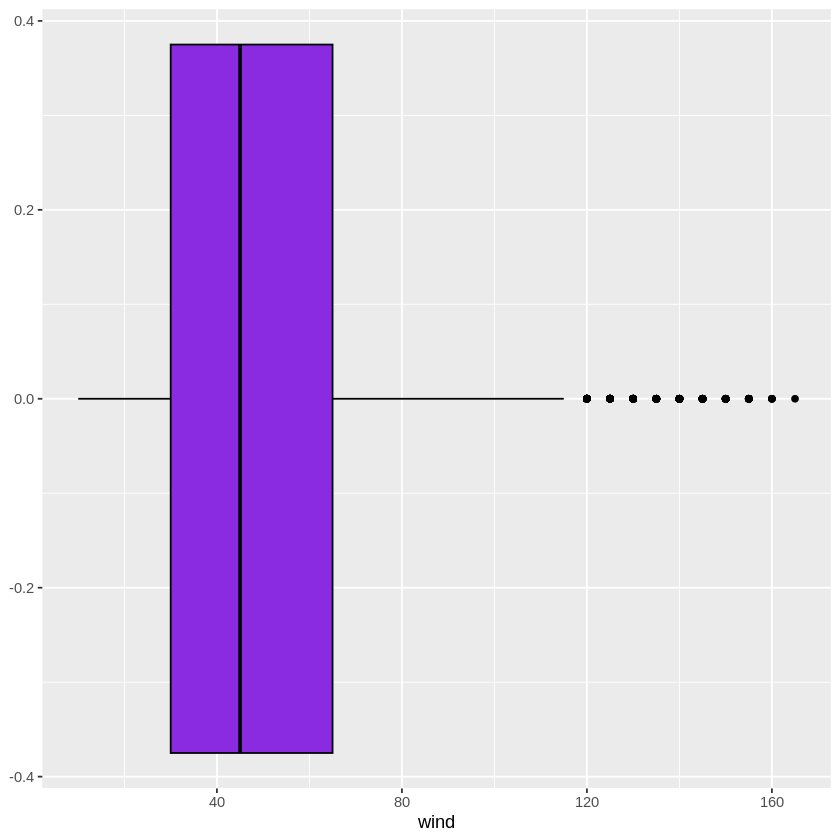

In [40]:
# create a boxplot
ggplot(storms, aes(x = wind)) + 
  geom_boxplot(color="black", fill="blueviolet")

## <a name="scatter-gg">Scatter Plots with `ggplot2`</a>
---

To create a scatter plot to compare two quantitative variables such as wind speed and pressure of storms:

- The **ggplot object** is the data frame `storms`.
- The **aesthetic** are the variables
  - `pressure` is the predictor plotted on the x-axis.
  - `wind` is the response plotted on the y-axis.t
- Geometric object is scatter.

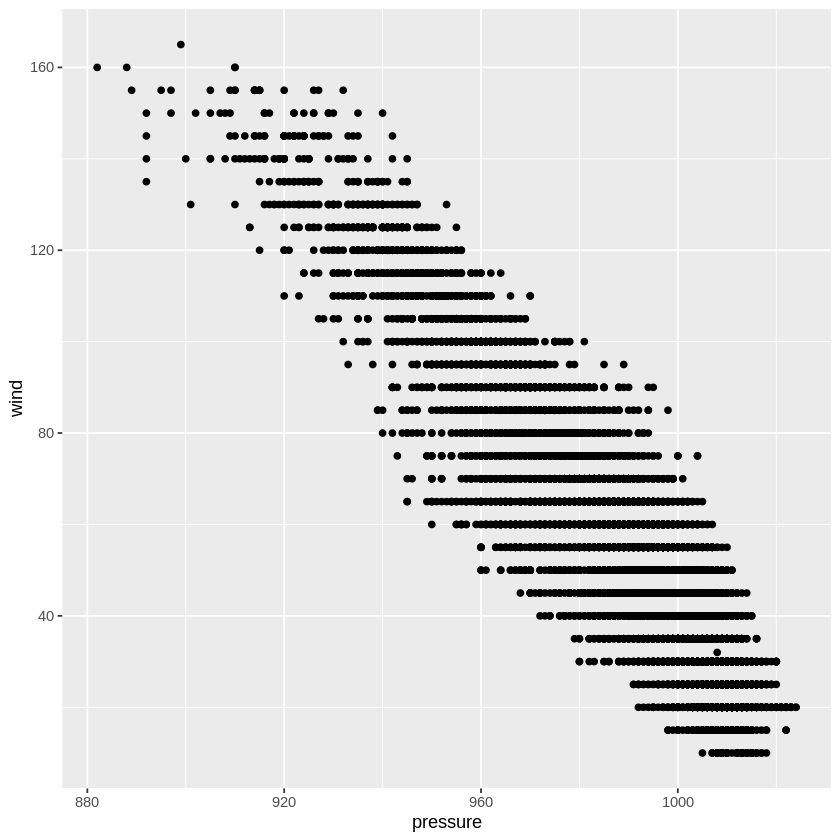

In [41]:
# create a scatter plot
ggplot(storms) + 
  geom_point(aes(x = pressure, y = wind))

## <a name="scaling">Scaling `ggplot2` plots</a>
---

In general, <font color="dodgerblue">**scaling**</font> is the process by which `ggplot2` maps variables to unique values. When this is done for discrete numeric or qualitative
variables, `ggplot2` will often scale the variable to distinct colors,
symbols, or sizes, depending on the aesthetic mapped.

In the example below, we map the `status` variable to the `color`
aesthetic, which is then scaled to different colors for the different
`status` levels.

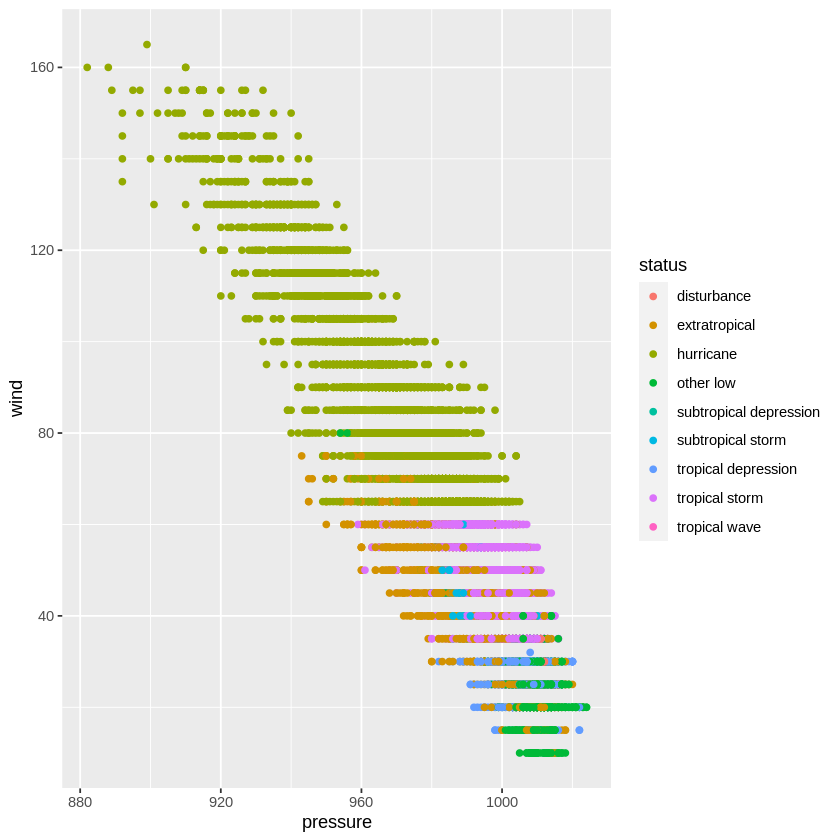

In [42]:
# scatter plot with scaling
ggplot(storms) + 
  geom_point(aes(x = pressure, y = wind, color = status))

### <a name="scale shape">Scaling by Shape</a>
---

Alternatively, we can map the `status` variable to the `shape`
aesthetic, which creates a plot with different shapes for each
observation based on the `status` level.

- By default, 6 shapes can be used.
- There are 9 different status of storms.
- The last option manually sets the shapes for each status to avoid an error.

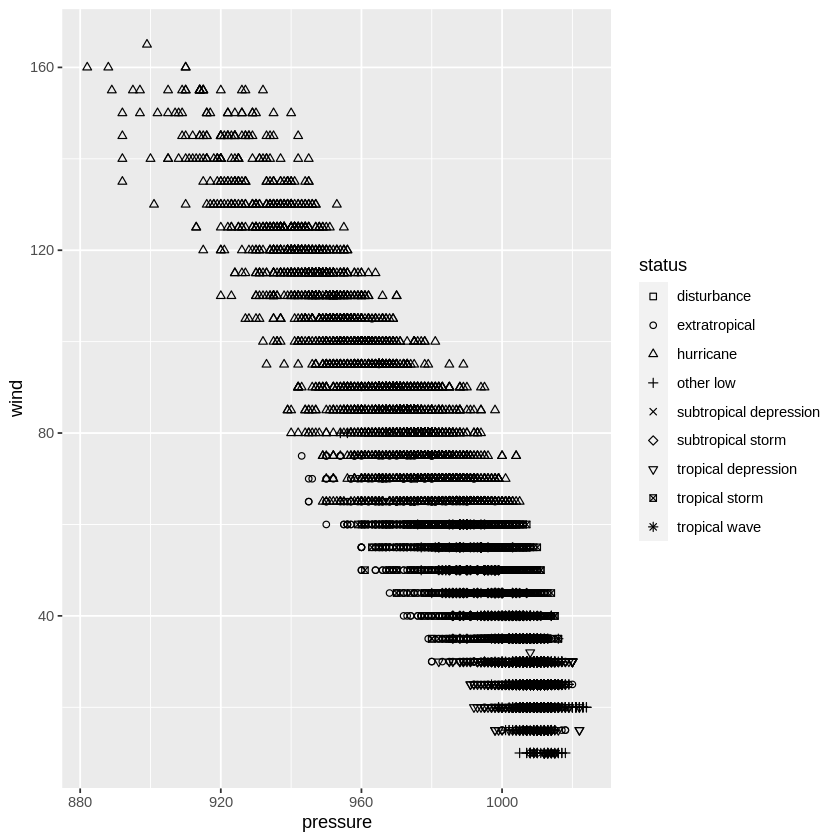

In [43]:
# scaling by shape
ggplot(storms) + 
  geom_point(aes(x = pressure, y = wind, shape = status)) + 
  scale_shape_manual(values=0:8)  # manually setting shapes

### <a name="multi-scale">Applying Multiple Scales</a>
---

We can even combine these two aesthetic mappings in a single plot to get
different colors and symbols for each level of `month` and `status`, respectively.

- By default, 6 shapes can be used.
- There are 9 different status of storms.
- The last option manually sets the shapes for each status to avoid an error.

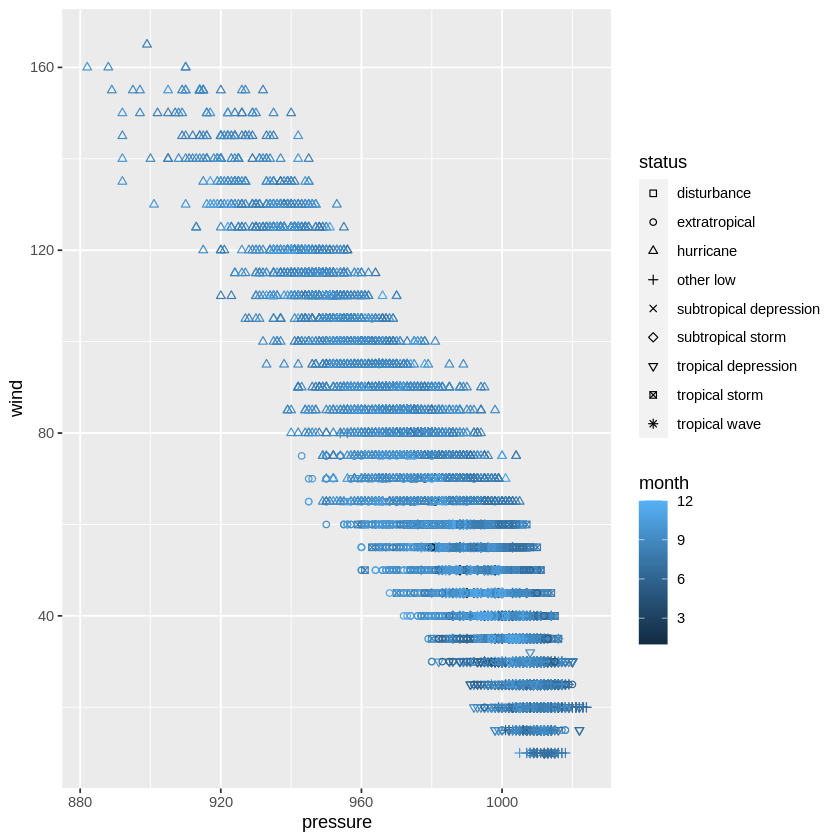

In [44]:
# scaling by month and status
ggplot(storms) + 
  geom_point(aes(x = pressure, y = wind, color = month, shape = status)) + 
  scale_shape_manual(values=0:8)  # manually setting shapes for status

## <a name="facet">Faceting in `ggplot2`</a>
---

<font color='dodgerblue'>**Faceting**</font> creates separate panels (facets) of a data frame based on one or more faceting variables.

To create various scatter plots (one for each category) to compare two quantitative variables such as wind speed and pressure of storms, we can add a `facet_grid`.

- Note the NA plot corresponds to the storms that are not hurricanes.

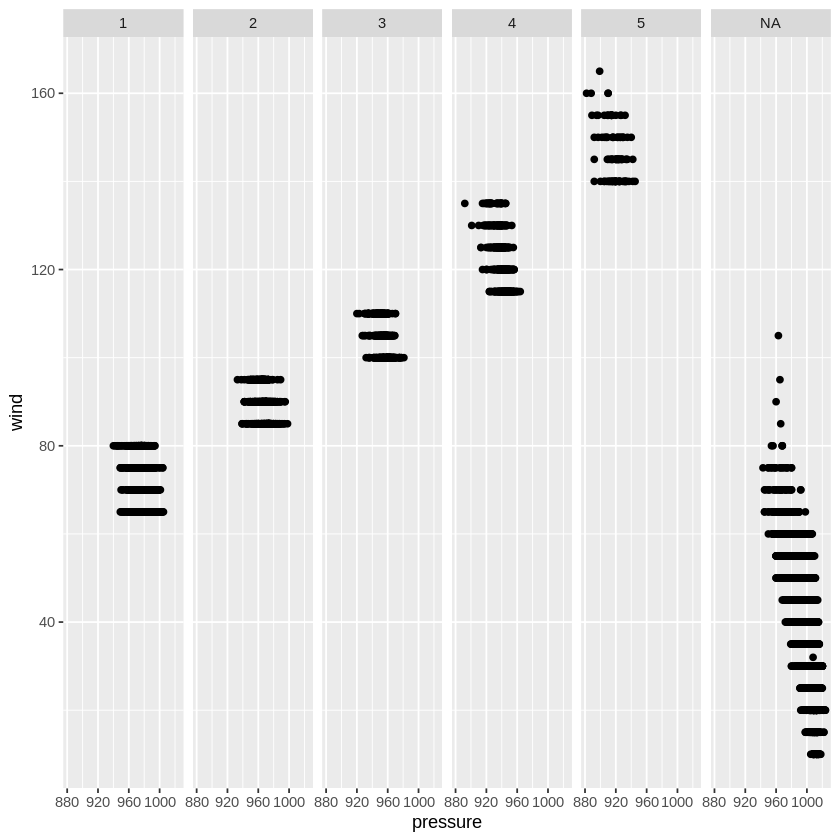

In [45]:
# faceting by category
ggplot(storms) + 
  geom_point(aes(x = pressure, y = wind)) + 
  facet_grid(~ category)

## <a name="bar-gg">Bar Charts with `ggplot2`</a>
---

Imagine we would like to compare the number of different types of storms (`status`) that occurred in each month.


### <a name="stacked-gg">Stacked Bar Charts of Counts with `ggplot2`</a>
---

To create a stacked bar chart of counts for one or more qualitative variable:

- The **ggplot object** is the data frame `storms`.
- Geometric **object** is `geom_bar`.
- The **aesthetic** is specified as:
  - Fill color, (`fill`) is `status`.
  - The height of each bar is summarizing the statistic (`stat`) is `"count"`.
  - The `position="stack"` creates a stacked bar chart of counts.

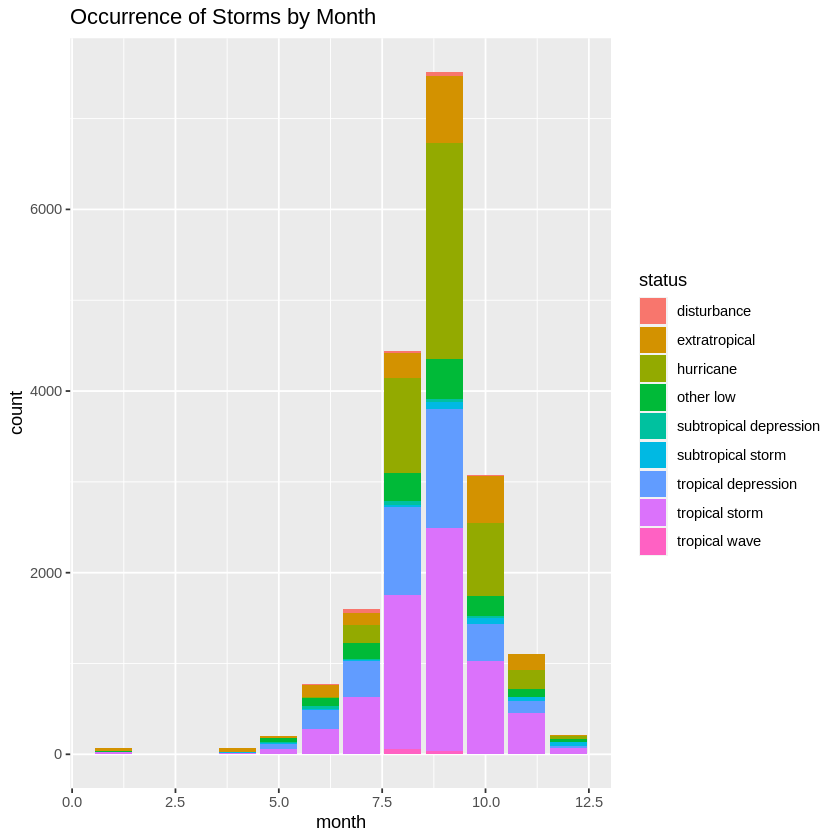

In [46]:
# stacks bars on top of each other 
ggplot(storms, aes(x=month)) + 
    geom_bar(aes(fill=status), stat = "count", position="stack") + 
    ggtitle("Occurrence of Storms by Month")

### <a name="stacked-relative-gg">Stacked Relative Frequency Bar Charts with `ggplot2`</a>
---

To create a stacked bar chart of relative frequencies for two qualitative variables:

- The **ggplot object** is the data frame `storms`.
- Geometric **object** is `geom_bar`.
- The **aesthetic** is specified as:
  - Fill color, (`fill`) is `status`.
  - The height of each bar is summarizing the statistic (`stat`) is `"count"`.
  - The `position="fill"` creates a stacked bar chart of relative frequencies.

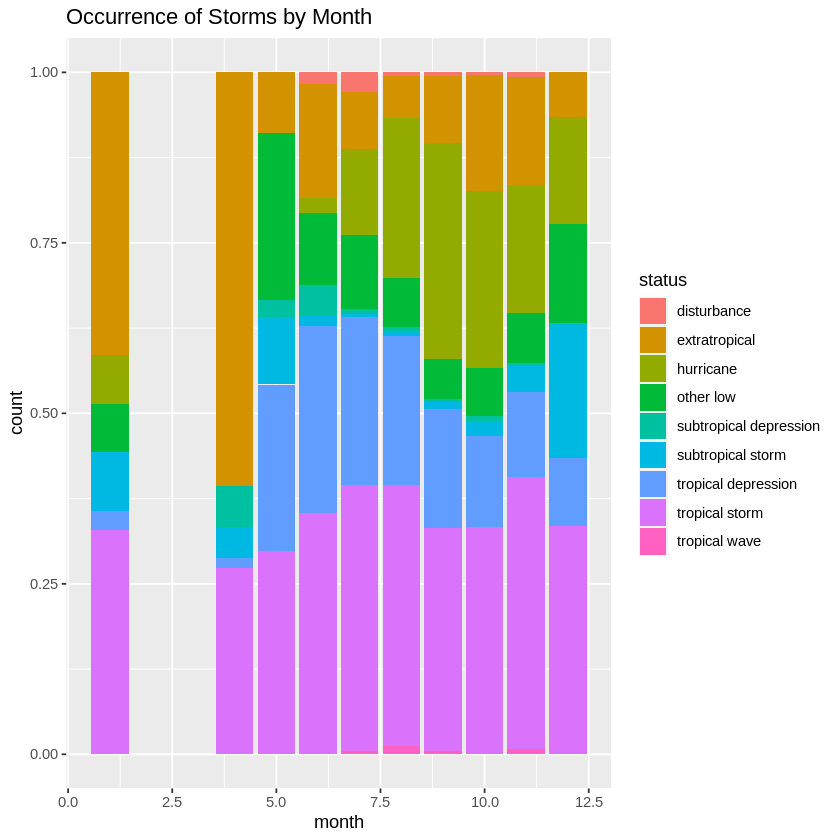

In [47]:
# stacks bars and standardizing each stack
ggplot(storms, aes(x=month)) + 
    geom_bar(aes(fill=status), stat = "count", position="fill") +  
    ggtitle("Occurrence of Storms by Month")

### <a name="grouped-gg">Grouped Bar Charts of Counts with `ggplot2`</a>
---

To create various types of bar plots for one or more qualitative variables:

- The **ggplot object** is the data frame `storms`.
- Geometric **object** is `geom_bar`.
- The **aesthetic** is specified as:
  - Fill color, (`fill`) is `status`.
  - The height of each bar is summarizing the statistic (`stat`) is `"count"`.
  - The `position="dodge"` creates a stacked bar chart.

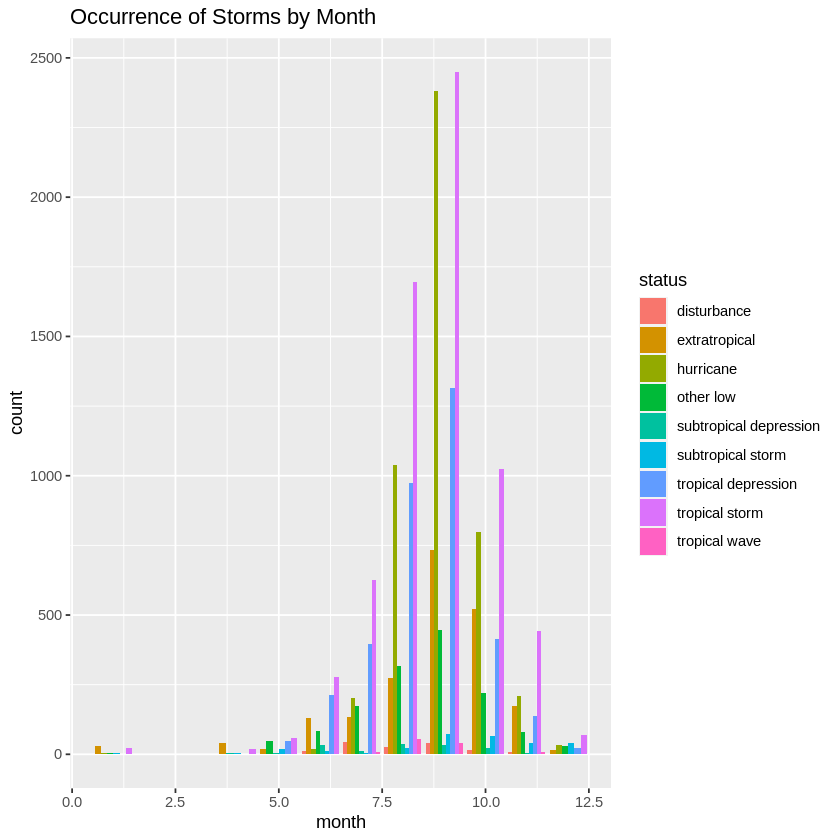

In [48]:
# creates grouped bar chart
ggplot(storms, aes(x=month)) + 
    geom_bar(aes(fill=status), stat = "count", position="dodge") +  
    ggtitle("Occurrence of Storms by Month")

# <a name="cc">Creative Commons License Information</a>
---

<a rel="license" href="https://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a><br /><span
xmlns:dct="http://purl.org/dc/terms/" property="dct:title">*Inquiry
Oriented Statistics*</font> by
<a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/CU-Denver-MathStats-OER/Statistical-Theory" property="cc:attributionName" rel="cc:attributionURL">Adam
Spiegler</a> is licensed under a
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative
Commons Attribution-NonCommercial-ShareAlike 4.0 International
License</a>.